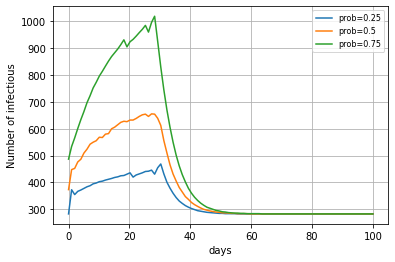

In [ ]:

!pip install zepid
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import nbinom
import matplotlib.pyplot as plt
from zepid import RiskRatio
import random
import sys
rr= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
     2.62187523, 3.38851776, 2.45791598, 4.23941893, 3.71095331, 6.23971344,
 5.11153959, 4.01806934, 3.3286167  ,4.05203058, 5.73365883 ,5.03936064,
 5.3782682 , 4.28934013, 4.27285216 ,4.93924556 ,4.3575437 , 5.1011028,
 3.61821651 ,4.78290627 ,4.31750379, 4.38844919 ,4.90537505 ,2.97589148,
 2.83180436 ,2.37764011 ,2.25308109, 2.00695798, 1.34996158, 1.33324555,
 1.20988724, 1.18478068, 1.29594286 ,1.53408864 ,1.65850837 ,1.32366534,
 1.31109618, 0.81446993, 0.70861988, 0.79171374 ,0.854929 ,  0.87321861,
 1.09110613, 1.24611213 ,1.26004031 ,1.88973308, 1.90920594, 2.1906703,
 1.69084937 ,1.46544721, 1.62538031, 1.57441959, 1.54760324, 1.37702881,
 1.40401005 ,0.89599598 ,0.89665082, 0.76048683 ,1.00017377 ,1.0134217,
 0.52349135, 0.45810737, 0.57362108,0.53887555]
def simu(days =100, nd=100, Rt=rr, mut =4, size=1, limit= 10000, pp=0.001, n0=283):
    kk= atrisk = np.repeat(0,days)
    nn= len(kk)
    tt=0
    if(nd > len(Rt)):
          sys.exit('the length of rt should not be smaller than nd')
    stoplimit = limit*(1-pp)
    nk = n0
    for k in range(nk):
        if(tt>stoplimit):
            Rt[1]=0.001
        ni = np.random.poisson(Rt[1])
        a_list=[0,1]
        distribution=[1-pp,pp]
        imuind = random.choices(a_list, distribution)
        if(imuind == 1):
            ni=0
        tt=tt+ni  
        if(ni>0):
            tk=  np.repeat(0,ni)
            for i in range(ni):
                tk[i]= np.random.negative_binomial(1,(size/(size + mut)),size)+1
                kk[tk[i]]= kk[tk[i]]+1
            pastevent = [*np.repeat(1,max(tk)-1),*np.repeat(0,(days-max(tk)+1))]
            #pastevent.tolist()
           # np.concatenate((atrisk,pastevent))
            atrisk = atrisk + pastevent
    for j in range(nd):
        nk = kk[j-1]
        if(nk>0):
            for k in range(nk):
                if(tt>stoplimit):
                    Rt[j]=0.001
                ni = np.random.poisson(Rt[j])
                a_list=[0,1]
                distribution=[1-pp,pp]
                imuind = random.choices(a_list, distribution) 
                if(imuind == 1):
                    ni =0
                tt = tt + ni
                if(ni > 0):
                    tk = np.repeat(0,ni)
                    for i in range(ni):
                        tk[i]=np.random.negative_binomial(1,(size/(size + mut)),size)+1+j
                        kk[tk[i]]=kk[tk[i]]+1
                    pastevent=[*np.repeat(0,(j-1)),*np.repeat(1,(max(tk)+1-j)),*np.repeat(0,(days-max(tk)))]
                   # np.concatenate((atrisk,pastevent))
                    atrisk = atrisk + pastevent
    output={'riskpopu':atrisk,'dailynew':kk,'total':tt}
    return output
#simu(nd=50)
rr=[1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
  1.8494742  ,  1.74918878  , 1.26467784  , 1.29585476  , 2.77134606 , 2.62436017 ,
  2.63311374  , 2.52348505  , 2.51708237  , 2.60244823 ,  2.3337834 ,  2.34604538 ,
  2.33458541 ,  2.3498725  ,  2.12360502 ,  2.13755926  , 1.98323993  , 1.94868304 ,
  1.95029167  , 1.94317098   ,2.4245713   , 1.69259629 ,  1.83870938  , 1.93870864,
  1.55302453 ,  1.47801861  , 1.53273365 ,  1.77100802  , 1.37349023   ,1.32544061 ,
  1.36223616   ,1.50765843  , 1.423495   ,  2.02653993  , 1.11252427  , 0.94206858 ,
  0.97230465,0.77230465,0.67230465,0.57230465,0.77230465,0.77230465,0.87230465,0.97230465,0.67230465,0.87230465,
    1.85029167  , 1.44317098   ,1.3245713   , 1.19259629 ,  1.33870938  , 1.43870864,
  0.95302453 ,  0.87801861  , 0.93273365 ,  0.97100802  , 0.97349023   ,0.92544061 ,
  0.96223616   ,0.90765843  , 0.923495   ,  0.92653993  , 0.91252427  , 0.94206858]
#random.seed(25)
#out1=simu(nd=100,Rt=rr)
#dailyFreq=out1['riskpopu']
#print(out1)
col_list=['location','date','total_cases','new_cases','new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed',
          'total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million',
          'new_deaths_per_million','new_deaths_smoothed_per_million','reproduction_rate']

#print(daily)
#rr= [*np.repeat(3.2,10),*np.repeat(2.2,10),*np.repeat(2,10),*np.repeat(1.1,10),*np.repeat(0.9,10),*np.repeat(0.8,5),*np.repeat(0.7,5),*np.repeat(0.3,5),*np.repeat(0.2,10),*np.repeat(0.1,50)]
#rr = [*np.repeat(3,5),*np.repeat(2.5,25),*np.repeat(2.3,5),*np.repeat(2.2,5),*np.repeat(2.1,5),*np.repeat(1,4),*np.repeat(0.5,5),*np.repeat(0.3,10),*np.repeat(0.25,6),*np.repeat(0.2,30)]
#rr= [*np.repeat(1.5,30),2,2,1.5,1.5,1.2,1.2,*np.repeat(2,4),*np.repeat(3,10),*np.repeat(0.9,50)]
random.seed(25)
outMA = newMA = []
gtotalA = []
for k3 in range(1000):
    this=[]
    thisnew=[]
    runi = simu(nd=30,Rt=rr)
    #print(runi['riskpopu'])
    for i in range(100):
        this.append(runi['riskpopu'][i]+283)
        thisnew.append(runi['dailynew'][i]+283)
    outMA.append(this)
    newMA.append(thisnew)
    gtotalA.append(runi['total'])

#print(outMA)
p250=[]
p500=[]
p750=[]
pNew250=[]
pNew500=[]
pNew750=[]
for i2 in range(100):
    tempar=[]
    tempar2=[]
    for i3 in range(len(outMA)):
        tempar.append(outMA[i3][i2])
        tempar2.append(newMA[i3][i2])
    p250.append(pd.to_numeric(np.quantile(tempar,0.25)))
    p500.append(pd.to_numeric(np.quantile(tempar,0.5)))
    p750.append(pd.to_numeric(np.quantile(tempar,0.75)))
    pNew250.append(pd.to_numeric(np.quantile(tempar2,0.25)))
    pNew500.append(pd.to_numeric(np.quantile(tempar2,0.5)))
    pNew750.append(pd.to_numeric(np.quantile(tempar2,0.75)))
#print(p500)
#plt.figure(1)
#t = np.linspace(0, 100, 150)
#plt.plot(t, p250)
#plt.plot(t, p500)
#plt.plot(t, p750)
#plt.show()
plt.figure(1)
t = np.linspace(0, 100, 100)
plt.plot(t, pNew250, label='prob=0.25')
plt.plot(t, pNew500, label='prob=0.5')
plt.plot(t, pNew750, label='prob=0.75')
plt.xlabel('days')
plt.ylabel('Number of infectious')
plt.grid()
plt.legend(loc='upper right', prop={'size': 8})
plt.show()
